homework 9
---
due: June 1 2022

authors: pegler, prüwasser, scheftner

## import libraries ...

... and prepare the data from **tutorial 11**

In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

N = 200

# create covariance matrix and adapt it a bit
M_cov = np.eye(2)
M_cov[0, 1] = 1
M_cov[1, 0] = 1
M_cov[1, 1] = 1
M_cov[0, 0] = 3

# create 3 arrays with different means and stack them
A_1 = np.random.multivariate_normal([-4, 0], M_cov, N)
A_2 = np.random.multivariate_normal([5, 2], M_cov, N)
A_3 = np.random.multivariate_normal([1, 1], M_cov, N)
X = np.vstack((A_1, A_2, A_3))

# create model and fit the data
gm = GaussianMixture(n_components = 3)
gm.fit(X)
pred = gm.predict(X)

## Part 1 

- use the above code to fit a gaussian mixture model to the same data with the number of clusters/components changing from 2 to 8. (all values from 2 to 8 with for loop).
- for each iteration, calculate the model fit measures BIC and AIC
- graph on a single graph, the number of iterations on the X-axis, and both AIC and BIC on the Y axis (with a line for AIC and another for BIC), 
- remember to add axis labels and legends (to see which one is AIC, which is BIC), try to make it look nice, by chaning fontsize, color, linewidth etc. 
- remember AIC and BIC are model fit measures, basedon the log-likelihood, and lower values indicate better model fit

### Lea's solution

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

N=100
Covar=np.eye(2)
Covar[0,1]=.5
Covar[1,0]=.5
# Means = 

D1=np.random.multivariate_normal([0,1.8],Covar,N)

Covar=np.eye(2)
Covar[0,1]=-.5
Covar[1,0]=-.5


D2=np.random.multivariate_normal([4,2],Covar,N)
D3=np.random.multivariate_normal([.3,-2],Covar,N)
XX=np.vstack((D1,D2,D3))

gm = GaussianMixture(n_components=3)


gm.fit(XX)
print('mean ',gm.means_)
print('covar ',gm.covariances_)
print('score ',gm.score(XX))   
print('BIC ',gm.bic(XX))   
print('AIC ',gm.aic(XX))  

mean  [[ 0.50367934 -2.09125741]
 [ 3.8209344   1.99641939]
 [ 0.07901652  1.91169129]]
covar  [[[ 0.84687135 -0.33587327]
  [-0.33587327  0.90698624]]

 [[ 0.79680662 -0.31294607]
  [-0.31294607  0.83385481]]

 [[ 1.22426189  0.73546012]
  [ 0.73546012  1.32275597]]]
score  -3.7072342780787046
BIC  2321.3048689163784
AIC  2258.340566847223


Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

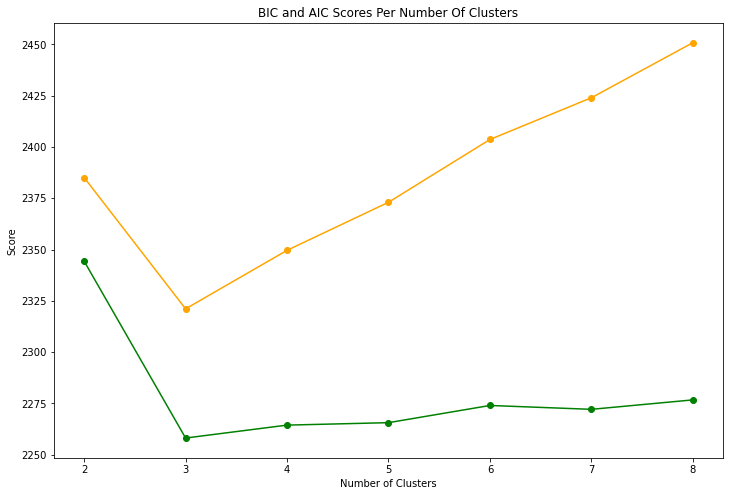

In [3]:

#range of cluster numbers
n_range = range(2,9)

# empty lists to store the BIC and AIC 
bic_score = []
aic_score = []

# Loop through the range and fit  model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(XX)
    
    #Append  BIC and AIC to lists
    bic_score.append(gm.bic(XX))
    aic_score.append(gm.aic(XX))
    

fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score,'-o',color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

#bic favors simple models, usually aic and bic should be similar. thex are meant to be minimized, so pick low spot (6 clusters, or 2?). 
#AIC tends to fit data better

## Part 2: implement k-means with numpy

- number of centroids optional
- intialize the centroids randomly (within the range of the data)
- number of steps optional 
- keep track of distance (distance to closest centroid should descrease)